In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf
import datetime
%matplotlib inline

In [2]:
start=datetime.datetime(2024,1,1)
end=datetime.datetime(2024,9,1)

In [3]:
google= yf.download("GOOGL", start=start, end=end)
google.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,138.550003,139.449997,136.479996,138.169998,138.011597,23711200
2024-01-03,137.250000,139.630005,137.080002,138.919998,138.760742,24212100
2024-01-04,138.419998,139.160004,136.350006,136.389999,136.233643,27137700
2024-01-05,136.750000,137.160004,135.149994,135.729996,135.574402,22506000
2024-01-08,136.289993,139.009995,136.259995,138.839996,138.680832,21404000


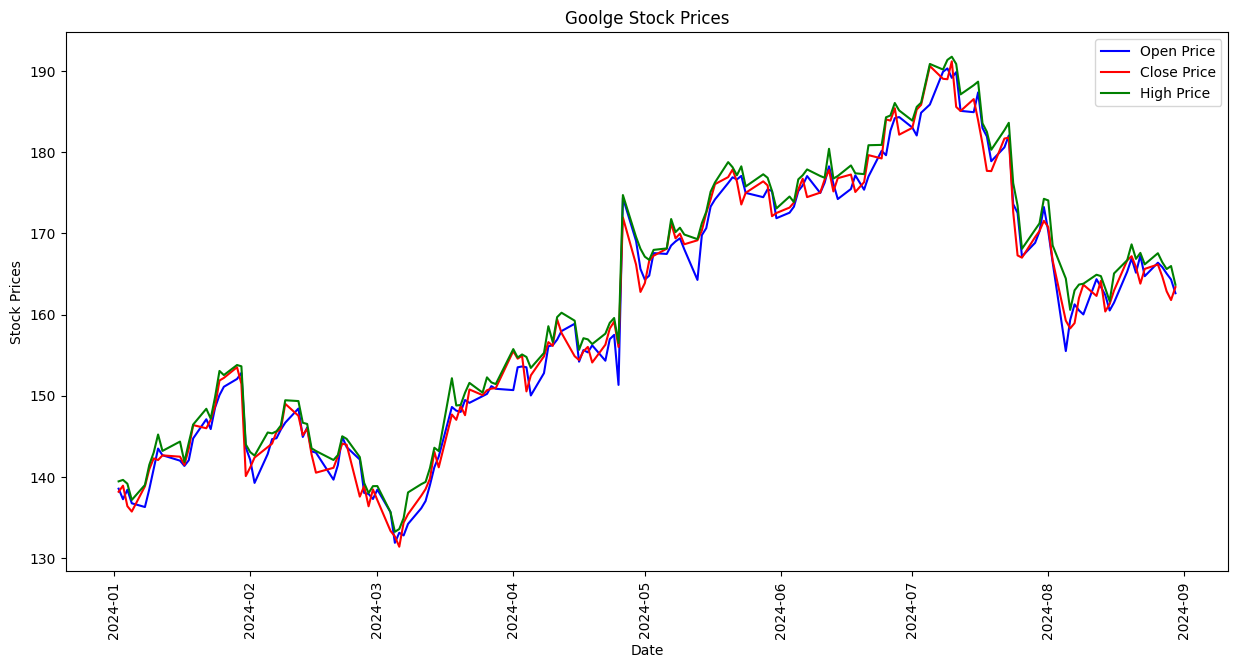

In [4]:
plt.figure(figsize=(15, 7))
plt.plot(google["Open"],c='b',label="Open Price")
plt.plot(google["Close"],c='r',label="Close Price")
plt.plot(google["High"],c='g',label="High Price")
plt.xticks(rotation=90)
plt.title("Goolge Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Prices")
plt.legend()

<Axes: xlabel='Date'>

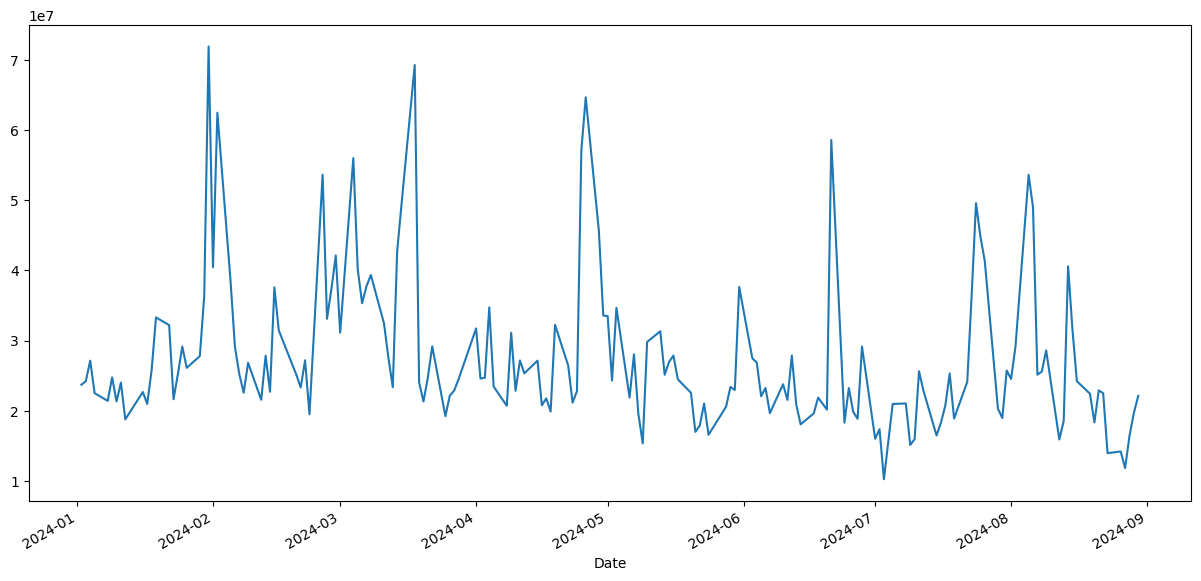

In [5]:
google["Volume"].plot(figsize=(15,7))

In [6]:
start=datetime.datetime(2012,1,1)
end=datetime.datetime(2022,12,31)

In [7]:
tesla= yf.download("TSLA", start=start, end=end)
ford= yf.download("F", start=start, end=end)
gm= yf.download("GM", start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000


In [9]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,11.00,11.25,10.99,11.13,6.232307,45709900
2012-01-04,11.15,11.53,11.07,11.30,6.327499,79725200
2012-01-05,11.33,11.63,11.24,11.59,6.489885,67877500
2012-01-06,11.74,11.80,11.52,11.71,6.557081,59840700
2012-01-09,11.83,11.95,11.70,11.80,6.607478,53981500


In [10]:
gm.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,20.830000,21.180000,20.750000,21.049999,15.895531,9321300
2012-01-04,21.049999,21.370001,20.750000,21.150000,15.971045,7856700
2012-01-05,21.100000,22.290001,20.959999,22.170000,16.741285,17880600
2012-01-06,22.260000,23.030001,22.240000,22.920000,17.307634,18234500
2012-01-09,23.200001,23.430000,22.700001,22.840000,17.247219,12084500


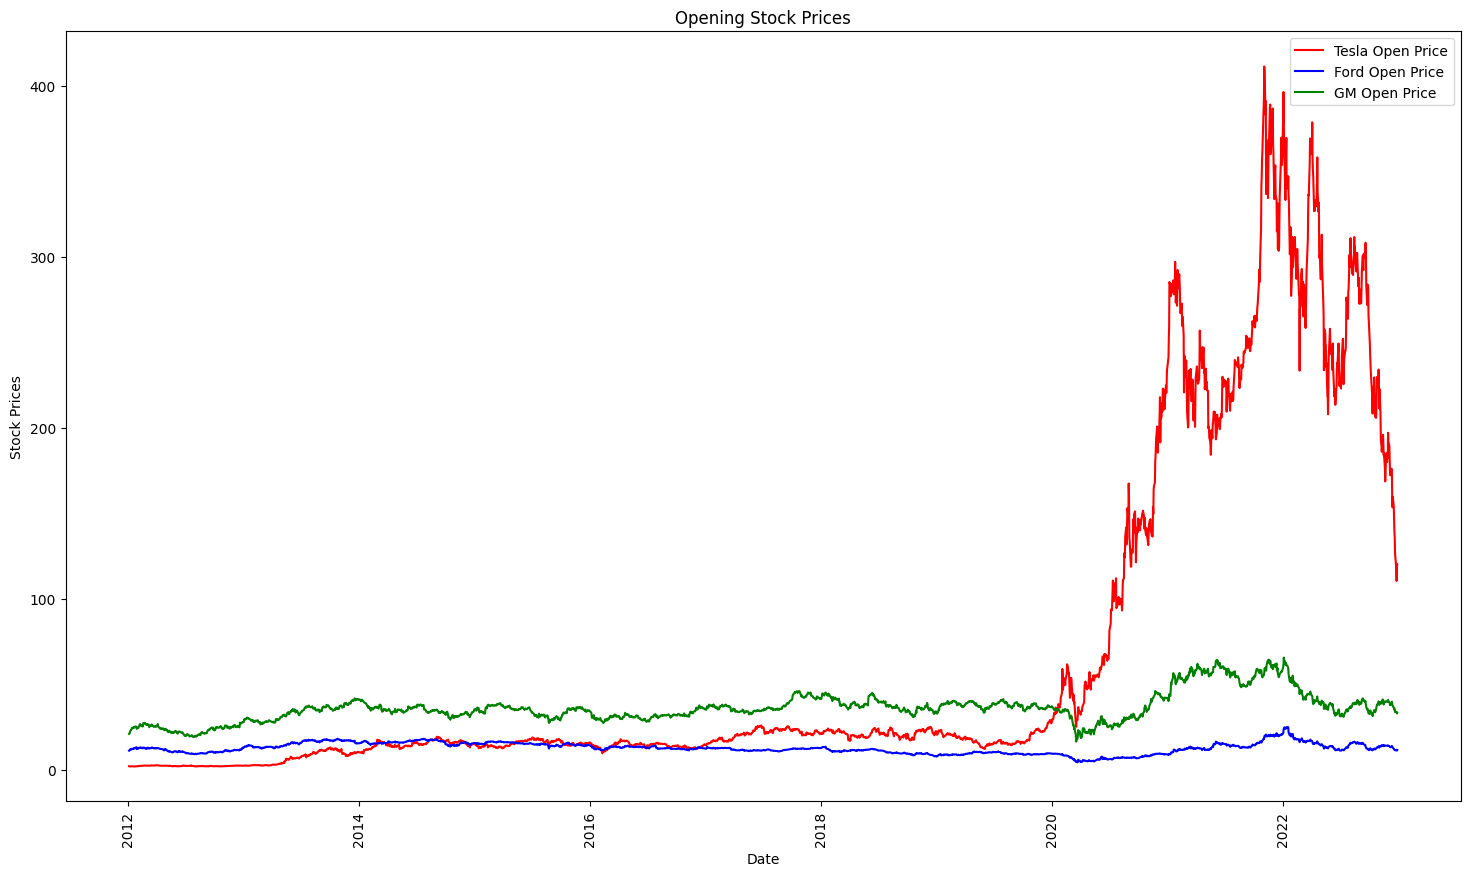

In [11]:
plt.figure(figsize=(18, 10))
plt.plot(tesla["Open"],c='r',label="Tesla Open Price")
plt.plot(ford["Open"],c='b',label="Ford Open Price")
plt.plot(gm["Open"],c='g',label="GM Open Price")
plt.xticks(rotation=90)
plt.title("Opening Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Prices")
plt.legend()

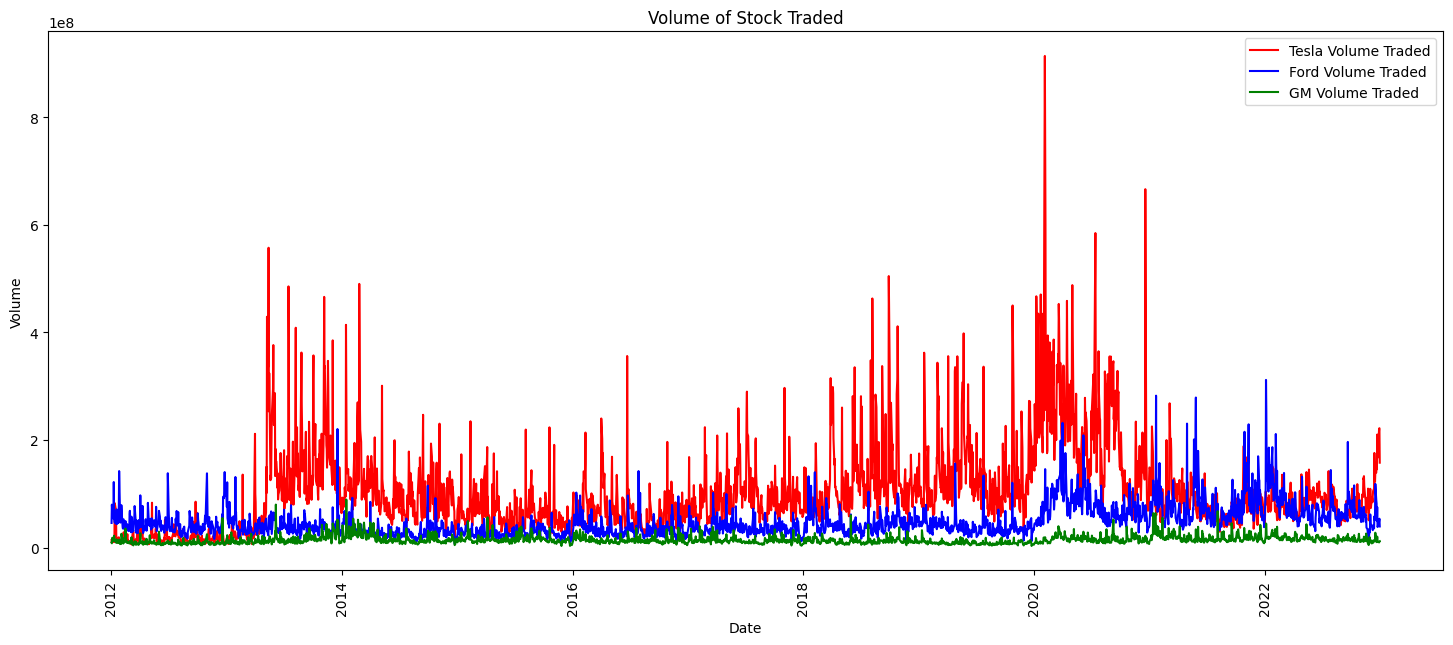

In [12]:
plt.figure(figsize=(18, 7))
plt.plot(tesla["Volume"],c='r',label="Tesla Volume Traded")
plt.plot(ford["Volume"],c='b',label="Ford Volume Traded")
plt.plot(gm["Volume"],c='g',label="GM Volume Traded")
plt.xticks(rotation=90)
plt.title("Volume of Stock Traded")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

# Total Traded Price

In [13]:
tesla["Total Traded"]=tesla["Open"]*tesla["Volume"]
ford["Total Traded"]=ford["Open"]*ford["Volume"]
gm["Total Traded"]=gm["Open"]*gm["Volume"]

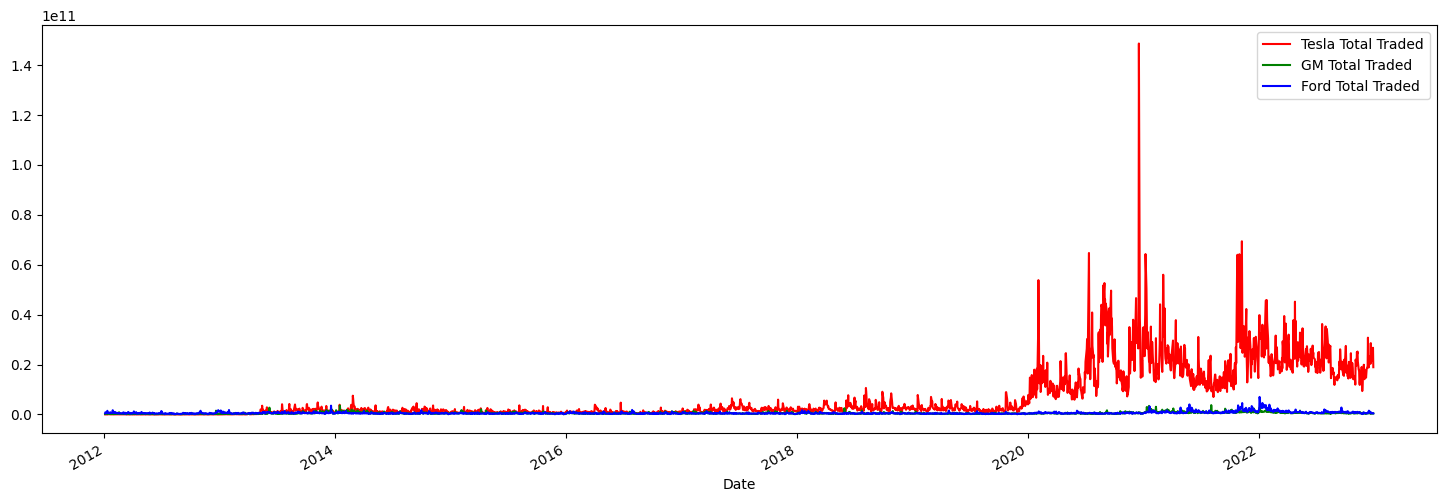

In [14]:
tesla["Total Traded"].plot(c="r",label="Tesla Total Traded",figsize=(18,6))
gm["Total Traded"].plot(c="g",label="GM Total Traded")
ford["Total Traded"].plot(c="b",label="Ford Total Traded")
plt.legend()

In [15]:
tesla["Total Traded"].argmax()

2256

In [16]:
tesla.iloc[2256]

,2020-12-18
Open,2.229667e+02
High,2.316667e+02
Low,2.095133e+02
Close,2.316667e+02
Adj Close,2.316667e+02
Volume,6.663786e+08
Total Traded,1.485802e+11


# Moving Average

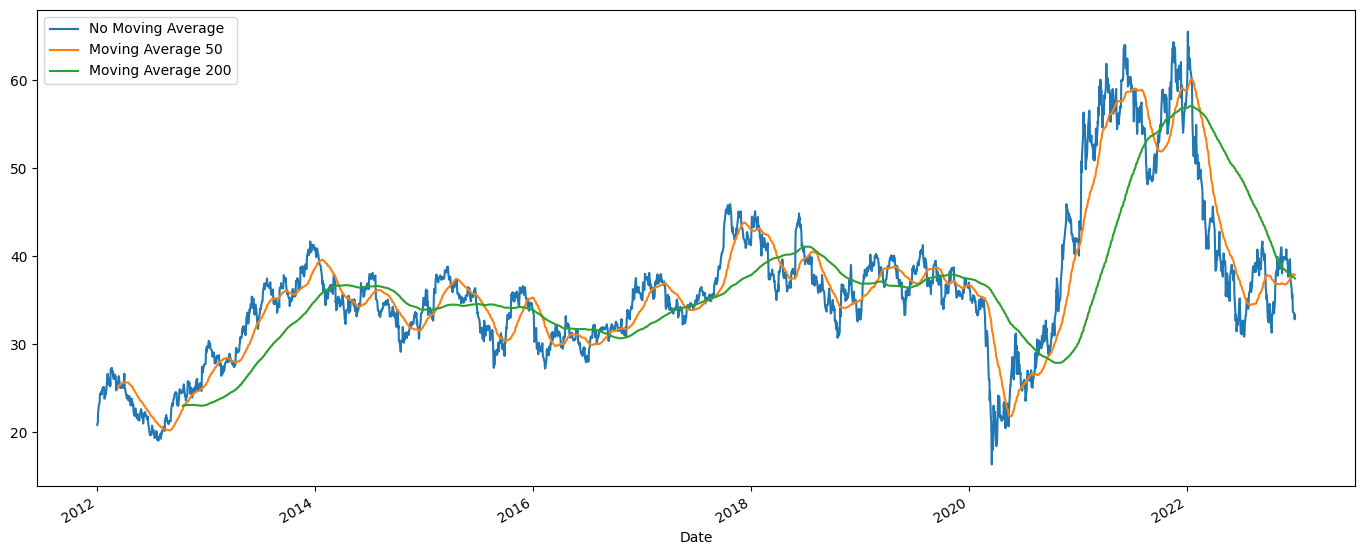

In [17]:
gm["Open"].plot(label="No Moving Average",figsize=(17,7))
gm["MA50"]=gm["Open"].rolling(50).mean()
gm["MA200"]=gm["Open"].rolling(200).mean()
gm["MA50"].plot(label="Moving Average 50")
gm["MA200"].plot(label="Moving Average 200")
plt.legend()

# Correlation and Scatter MAtrix

In [18]:
from pandas.plotting import scatter_matrix

In [19]:
car_comp=pd.concat([tesla["Open"],gm["Open"],ford["Open"]],axis=1)
car_comp.columns=["Tesla Open","GM Open", "Ford Open"]

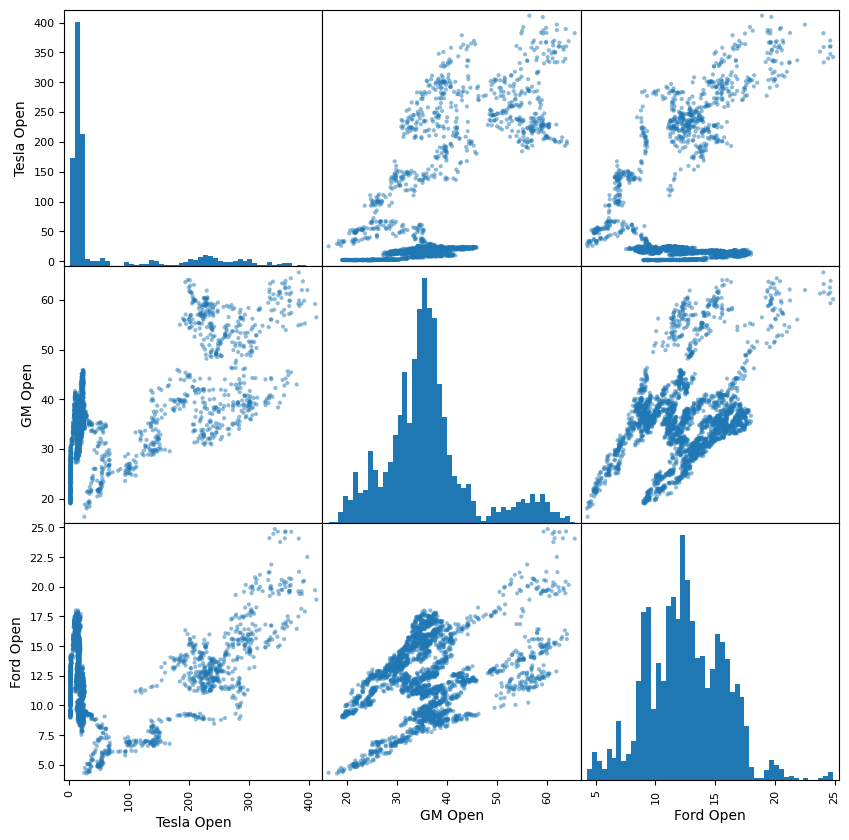

In [20]:
scatter_matrix(car_comp,figsize=(10,10),hist_kwds={"bins":50});

# Candle Stick Charts

In [21]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
ford_reset=ford.loc["2012-01":"2012-01"].reset_index()
ford_reset["date_ax"]=ford_reset["Date"].apply(lambda date: date2num(date))
ford_values=[tuple(vals) for vals in ford_reset[["date_ax","Open","High","Low","Close"]].values]
mondays=WeekdayLocator(MONDAY)
alldays=DayLocator()
weekFormatter=DateFormatter("%b %d")
dayFormatter=DateFormatter("%d")

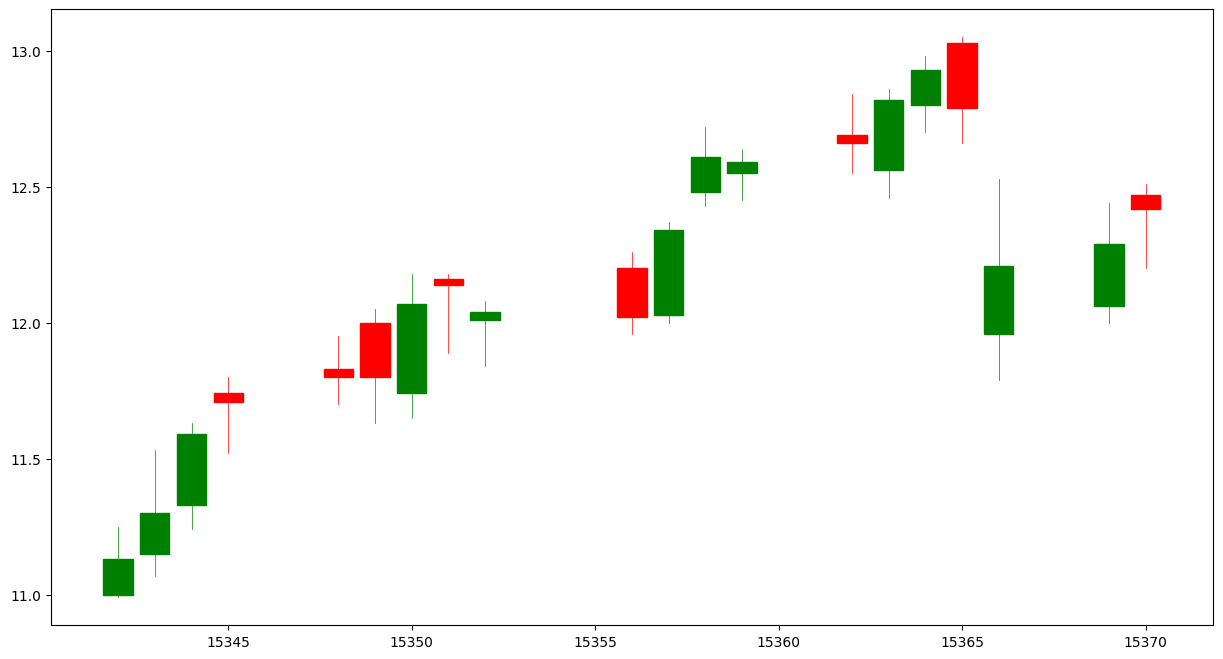

In [22]:
fig,ax=plt.subplots(figsize=(15,8))
candlestick_ohlc(ax,ford_values,width=0.8,colorup="g");

# Daily Percentage Change


In [23]:
tesla["Returns"]=(tesla["Close"]/tesla["Close"].shift(1))-1
gm["Returns"]=(gm["Close"]/gm["Close"].shift(1))-1
ford["Returns"]=(ford["Close"]/ford["Close"].shift(1))-1

# Volatility

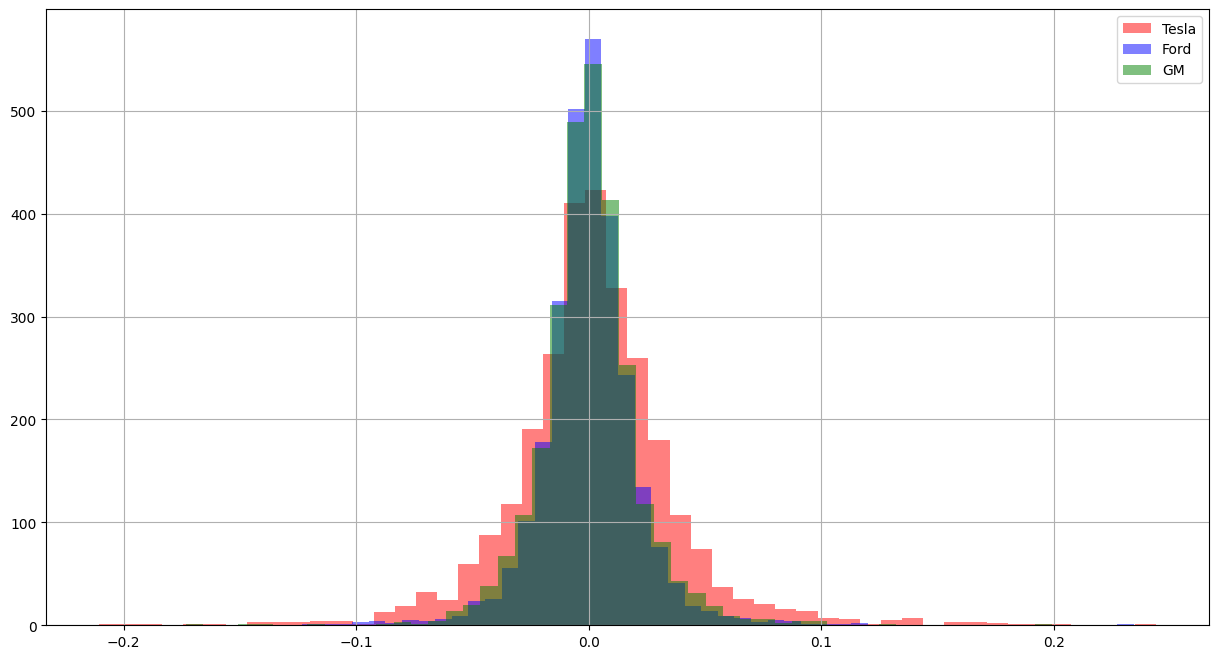

In [24]:
tesla["Returns"].hist(bins=50,color="red",alpha=0.5,label="Tesla",figsize=(15,8))
ford["Returns"].hist(bins=50,color="Blue",alpha=0.5,label="Ford")
gm["Returns"].hist(bins=50,color='green',alpha=0.5,label="GM")
plt.legend()

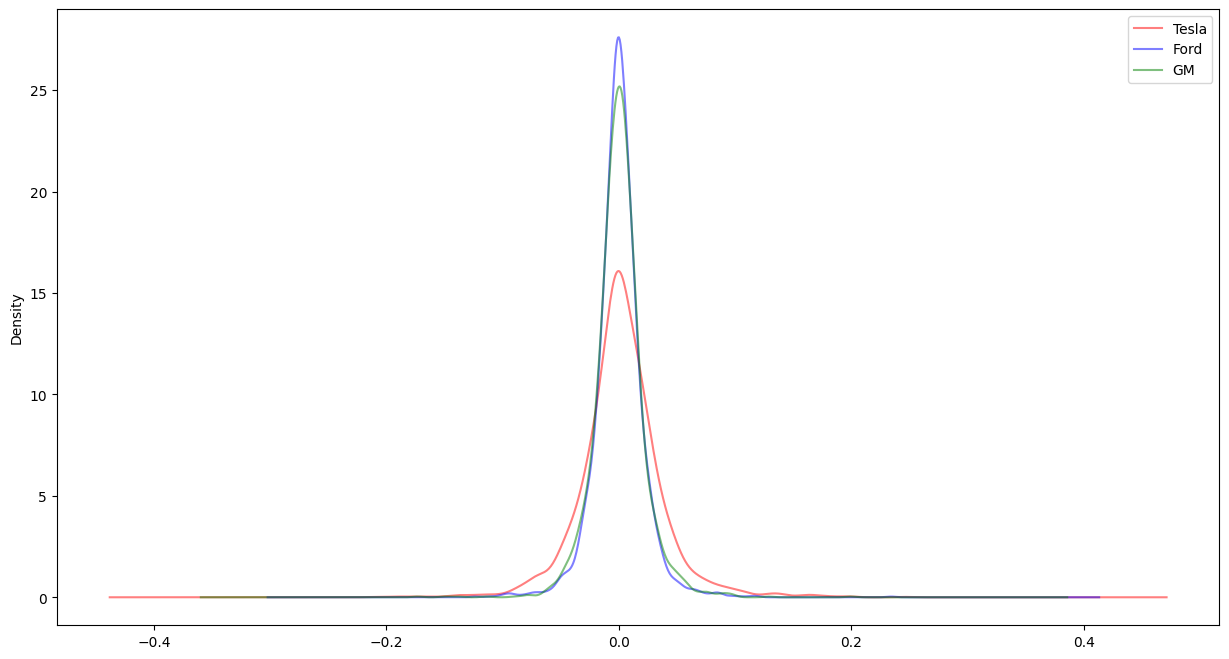

In [25]:
tesla["Returns"].plot(kind="kde",color="red",alpha=0.5,label="Tesla",figsize=(15,8))
ford["Returns"].plot(kind="kde",color="Blue",alpha=0.5,label="Ford")
gm["Returns"].plot(kind="kde",color='green',alpha=0.5,label="GM")
plt.legend()

# Box-Plots

<Axes: >

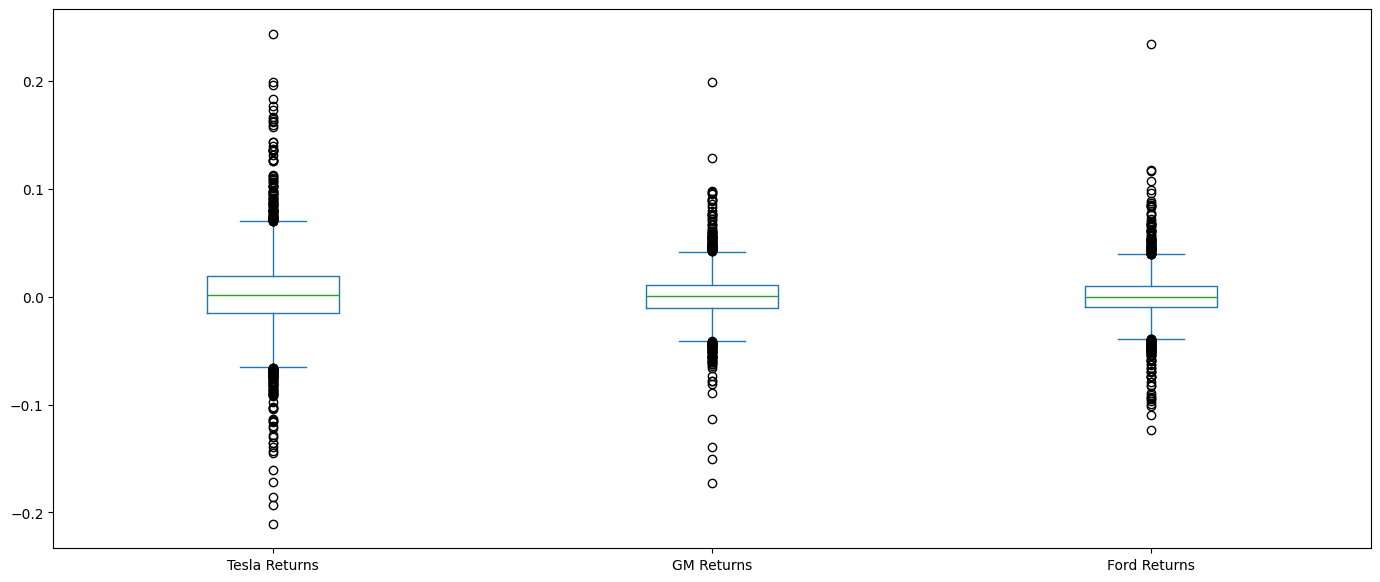

In [26]:
box_df=pd.concat([tesla["Returns"],gm["Returns"],ford["Returns"]],axis=1)
box_df.columns=["Tesla Returns","GM Returns", "Ford Returns"]
box_df.plot(kind="box",figsize=(17,7))

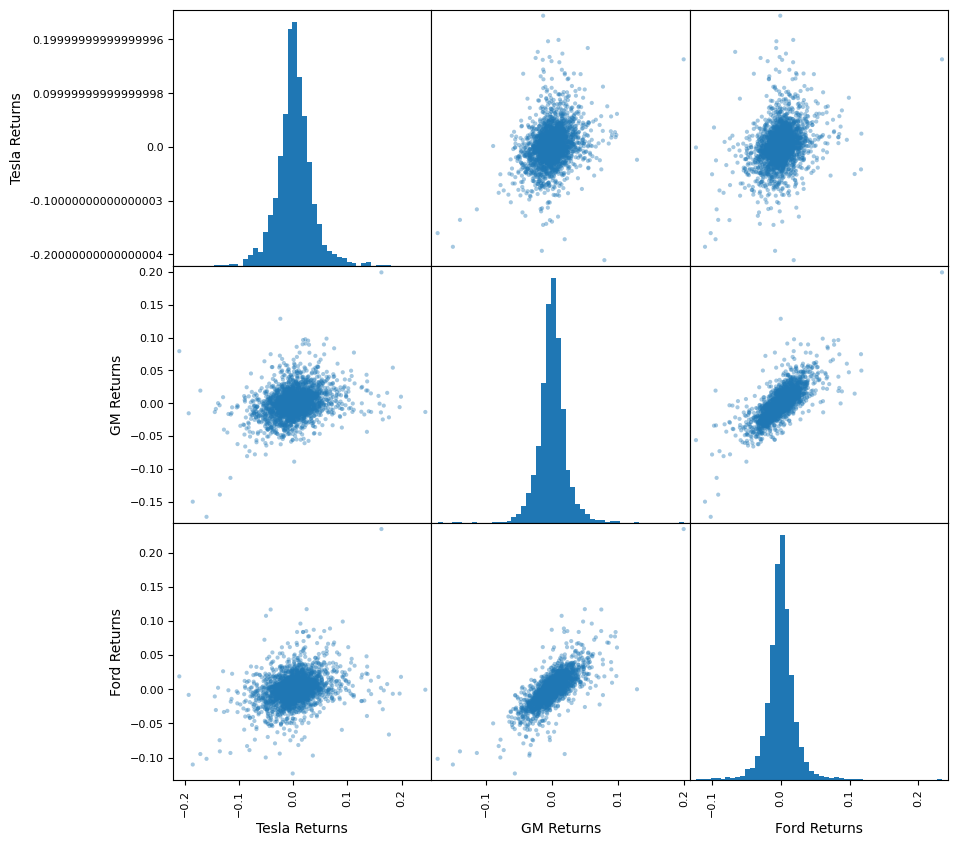

In [27]:
scatter_matrix(box_df,hist_kwds={"bins":50},figsize=(10,10),alpha=0.4);

# Cumulative Returns

In [28]:
tesla["Cumulative Returns"]=(1+tesla["Returns"]).cumprod()
gm["Cumulative Returns"]=(1+gm["Returns"]).cumprod()
ford["Cumulative Returns"]=(1+ford["Returns"]).cumprod()

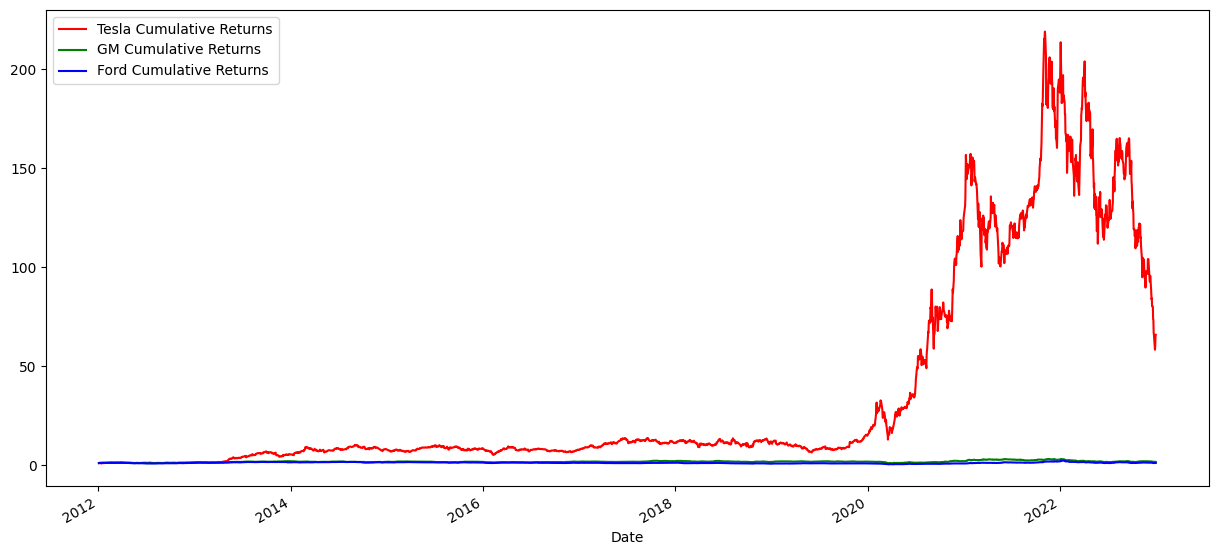

In [29]:
tesla["Cumulative Returns"].plot(figsize=(15,7),label="Tesla Cumulative Returns",color="Red")
gm["Cumulative Returns"].plot(figsize=(15,7),label="GM Cumulative Returns",color="green")
ford["Cumulative Returns"].plot(figsize=(15,7),label="Ford Cumulative Returns",color="blue")
plt.legend()